# Analysis on Voter Turnout Data from 2020 General Election
# By: Preeti Bobba and Mallika Dinakar

# Introduction:
The 2020 general election was one of the most important and historical elections in the United States, having a record turnout with Joe Biden receiving the most number of votes in history of any presidential candidate.

The overall objective of this project will be to analyze data about the voter turnout in each state of the United States during the 2020 general election. Throughout this tutorial, we will attempt to find potential trends between the voter turnout rate and state, the number of eligible voters and state, and how they correlate. Additionally, we will look at trends between the winner of the election in each state and the voter turnout rate in that state.

# Data Collection:
During this step, we will collect the data from websites/files. We have collected the data from https://data.world/government/vep-turnout, which got their data from each state's election site, and put it into a dataframe by using the pandas.read_csv function (more info at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Additionally, we collected data about the winner of each state from https://graphics.reuters.com/USA-ELECTION/RESULTS-LIVE-US/jbyprxelqpe/. This will allow us to be able to manipulate the data in the next step to look cleaner.

In [373]:
import pandas as pd
import numpy as np

In [374]:
df = pd.read_csv("2020 November General Election - Turnout Rates.csv")
winners = pd.read_csv("Winner of Election by State.csv")

In [375]:
df.head()

,State,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Denominators,Unnamed: 8,VEP Components (Modifications to VAP to Calculate VEP),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,Source,NaN,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate (Total Ballots Counted),VEP Turnout Rate (Highest Office),Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
1,United States,NaN,NaN,"159,633,396","158,240,239",66.7%,66.1%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
2,Alabama,https://www.sos.alabama.gov/sites/default/file...,OFFICIAL,"2,325,000","2,323,282",63.1%,63.1%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
3,Alaska,https://www.elections.alaska.gov/results/20GEN...,OFFICIAL,"361,400","359,530",68.8%,68.4%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
4,Arizona,https://results.arizona.vote/#/featured/18/0,OFFICIAL,"3,420,565","3,385,294",65.9%,65.2%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ


# Data Processing:
During this step, we will organize or tidy the data so that it is more readable and easier to manipulate and perform an analysis on. First, we merged the two datasets so that the dataset with the turnout rates include the winner of each state as well. In the untidied data, the first row is the title of each column and the title row say "Unnamed." We renamed the title row to the according title name from the first row and deleted the first row. Additionally, we dropped the Source and State Abv column since it is unnecessary.

In [376]:
df = pd.merge(df, winners)

In [377]:
df = df.rename(columns={"Unnamed: 1": "Source", "Unnamed: 2": "DropThis", 
                        "Unnamed: 3": "Total Ballots Counted (Estimate)", "Unnamed: 4": "Vote for Highest Office (President)", 
                        "Unnamed: 5": "VEP Turnout Rate (Total Ballots Counted)", "Unnamed: 6": "VEP Turnout Rate (Highest Office)", 
                        "Denominators": "Voting-Eligible Population (VEP)", "Unnamed: 8": "Voting-Age Population (VAP)", 
                        "VEP Components (Modifications to VAP to Calculate VEP)": "% Non-citizen)", "Unnamed: 10": "Prison", 
                        "Unnamed: 11": "Probation", "Unnamed: 12": "Parole", "Unnamed: 13": "Total Ineligible Felon", 
                        "Unnamed: 14": "Overseas Eligible", "Unnamed: 15": "State Abv"})

In [378]:
df = df.drop(axis=1, labels=['Source', 'DropThis', 'State Abv'])
df = df.drop(axis=0, index=0)
df = df.replace(',','', regex=True)

Additionally, we made a new data table for the original first row of the data which was the data about all of the United States, then reset the index of the states data table.

In [379]:
data = df[0:1]
data['Total Ballots Counted (Estimate)'] = data['Total Ballots Counted (Estimate)'].astype(int)
data['Vote for Highest Office (President)'] = data['Vote for Highest Office (President)'].astype(int)
data['Voting-Eligible Population (VEP)'] = data['Voting-Eligible Population (VEP)'].astype(int)
data['Voting-Age Population (VAP)'] = data['Voting-Age Population (VAP)'].astype(int)
data['Prison'] = data['Prison'].astype(int)
data['Probation'] = data['Probation'].astype(int)
data['Parole'] = data['Parole'].astype(int)
data['Total Ineligible Felon'] = data['Total Ineligible Felon'].astype(int)
data

<ipython-input-379-3f4db6e3269c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Ballots Counted (Estimate)'] = data['Total Ballots Counted (Estimate)'].astype(int)
<ipython-input-379-3f4db6e3269c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Vote for Highest Office (President)'] = data['Vote for Highest Office (President)'].astype(int)
<ipython-input-379-3f4db6e3269c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,State,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate (Total Ballots Counted),VEP Turnout Rate (Highest Office),Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen),Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Winner of State
1,United States,159633396,158240239,66.7%,66.1%,239247182,257605088,7.8%,1461074,1962811,616440,3294457,4971025,Biden


In [380]:
df = df.drop(axis=0, index=1)
df = df.reset_index()
del df['index']
df = df.drop(axis=1, labels=['Overseas Eligible'])

Since all the numbers in the data table are currently Strings, we have to convert them to integers in order to perform an analysis with them later on.

In [381]:
df['Total Ballots Counted (Estimate)'] = df['Total Ballots Counted (Estimate)'].astype(int)
df['Vote for Highest Office (President)'] = df['Vote for Highest Office (President)'].astype(int)
df['Voting-Eligible Population (VEP)'] = df['Voting-Eligible Population (VEP)'].astype(int)
df['Voting-Age Population (VAP)'] = df['Voting-Age Population (VAP)'].astype(int)
df['Prison'] = df['Prison'].astype(int)
df['Probation'] = df['Probation'].astype(int)
df['Parole'] = df['Parole'].astype(int)
df['Total Ineligible Felon'] = df['Total Ineligible Felon'].astype(int)
df['VEP Turnout Rate (Total Ballots Counted)'] = df['VEP Turnout Rate (Total Ballots Counted)'].str.rstrip('%').astype('float')
df['VEP Turnout Rate (Highest Office)'] = df['VEP Turnout Rate (Highest Office)'].str.rstrip('%').astype('float')
df['% Non-citizen)'] = df['% Non-citizen)'].str.rstrip('%').astype('float')
df

,State,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate (Total Ballots Counted),VEP Turnout Rate (Highest Office),Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen),Prison,Probation,Parole,Total Ineligible Felon,Winner of State
0,Alabama,2325000,2323282,63.1,63.1,3683055,3837540,2.3,25898,50997,10266,67782,Trump
1,Alaska,361400,359530,68.8,68.4,525568,551117,3.4,4293,2074,1348,6927,Trump
2,Arizona,3420565,3385294,65.9,65.2,5189000,5798473,8.9,38520,76844,7536,93699,Biden
3,Arkansas,1223675,1219069,56.1,55.9,2182375,2331171,3.6,17510,36719,24698,64974,Trump
4,California,17783784,17495826,68.5,67.4,25962648,30783255,15.0,104730,0,102586,207316,Biden
5,Colorado,3295666,3256952,76.4,75.5,4313054,4595504,5.7,18905,0,0,18905,Biden
6,Connecticut,1861086,1824280,71.5,70.1,2603327,2839560,7.7,13268,0,4452,17720,Biden
7,Delaware,509241,504010,70.7,69.9,720531,780822,5.8,5874,14176,350,15013,Biden
8,District of Columbia,346491,344356,64.1,63.7,540685,582065,7.1,0,0,0,0,Biden
9,Florida,11144855,11067456,71.7,71.2,15551739,17543341,10.1,91674,205033,4345,223139,Trump


# Exploratory Data Analysis:


Now that our data is all cleaned up and easy to use, we can begin analyzing it!
Now we are going to calculate statistics for the total ballots counted such as the mean, median, minimum, maximum, and standard deviation (more info on numpy statistics at https://www.tutorialspoint.com/numpy/numpy_statistical_functions.htm). These are the basic statistics for any data set. It will help us see the central tendency and get a better understanding of our data.

In [382]:
mean = np.mean(df['Total Ballots Counted (Estimate)'])
median = np.median(df['Total Ballots Counted (Estimate)'])
mini = np.min(df['Total Ballots Counted (Estimate)'])
maxi = np.max(df['Total Ballots Counted (Estimate)'])
stddev = np.std(df['Total Ballots Counted (Estimate)'])
print('SUMMARY STATS FOR TOTAL BALLOTS COUNTED')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median, '\nMin: ', mini, '\nMax: ', maxi)

SUMMARY STATS FOR TOTAL BALLOTS COUNTED
Mean:  3130066.588235294 
Std Dev:  3306188.1890966464 
Median:  2180000.0 
Min:  278503 
Max:  17783784


In [383]:
mean = np.mean(df['Voting-Age Population (VAP)'])
median = np.median(df['Voting-Age Population (VAP)'])
stddev = np.std(df['Voting-Age Population (VAP)'])
print('SUMMARY STATS FOR VOTING AGE POPULATION')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median)

SUMMARY STATS FOR VOTING AGE POPULATION
Mean:  5051080.196078432 
Std Dev:  5693749.39572245 
Median:  3479257.0


As shown, the mean for total ballots counted is 3,130,066 and the mean for voting-age population is 5,051,080. This means that on average, 3,130,066/5,051,080 or 62% of people who are eligible to vote actually vote. Now let’s find out what states have the highest turnout rate. We can start by making a bar chart for the voter turnout rate in every state (more info on creating bar graphs at https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.bar.html).

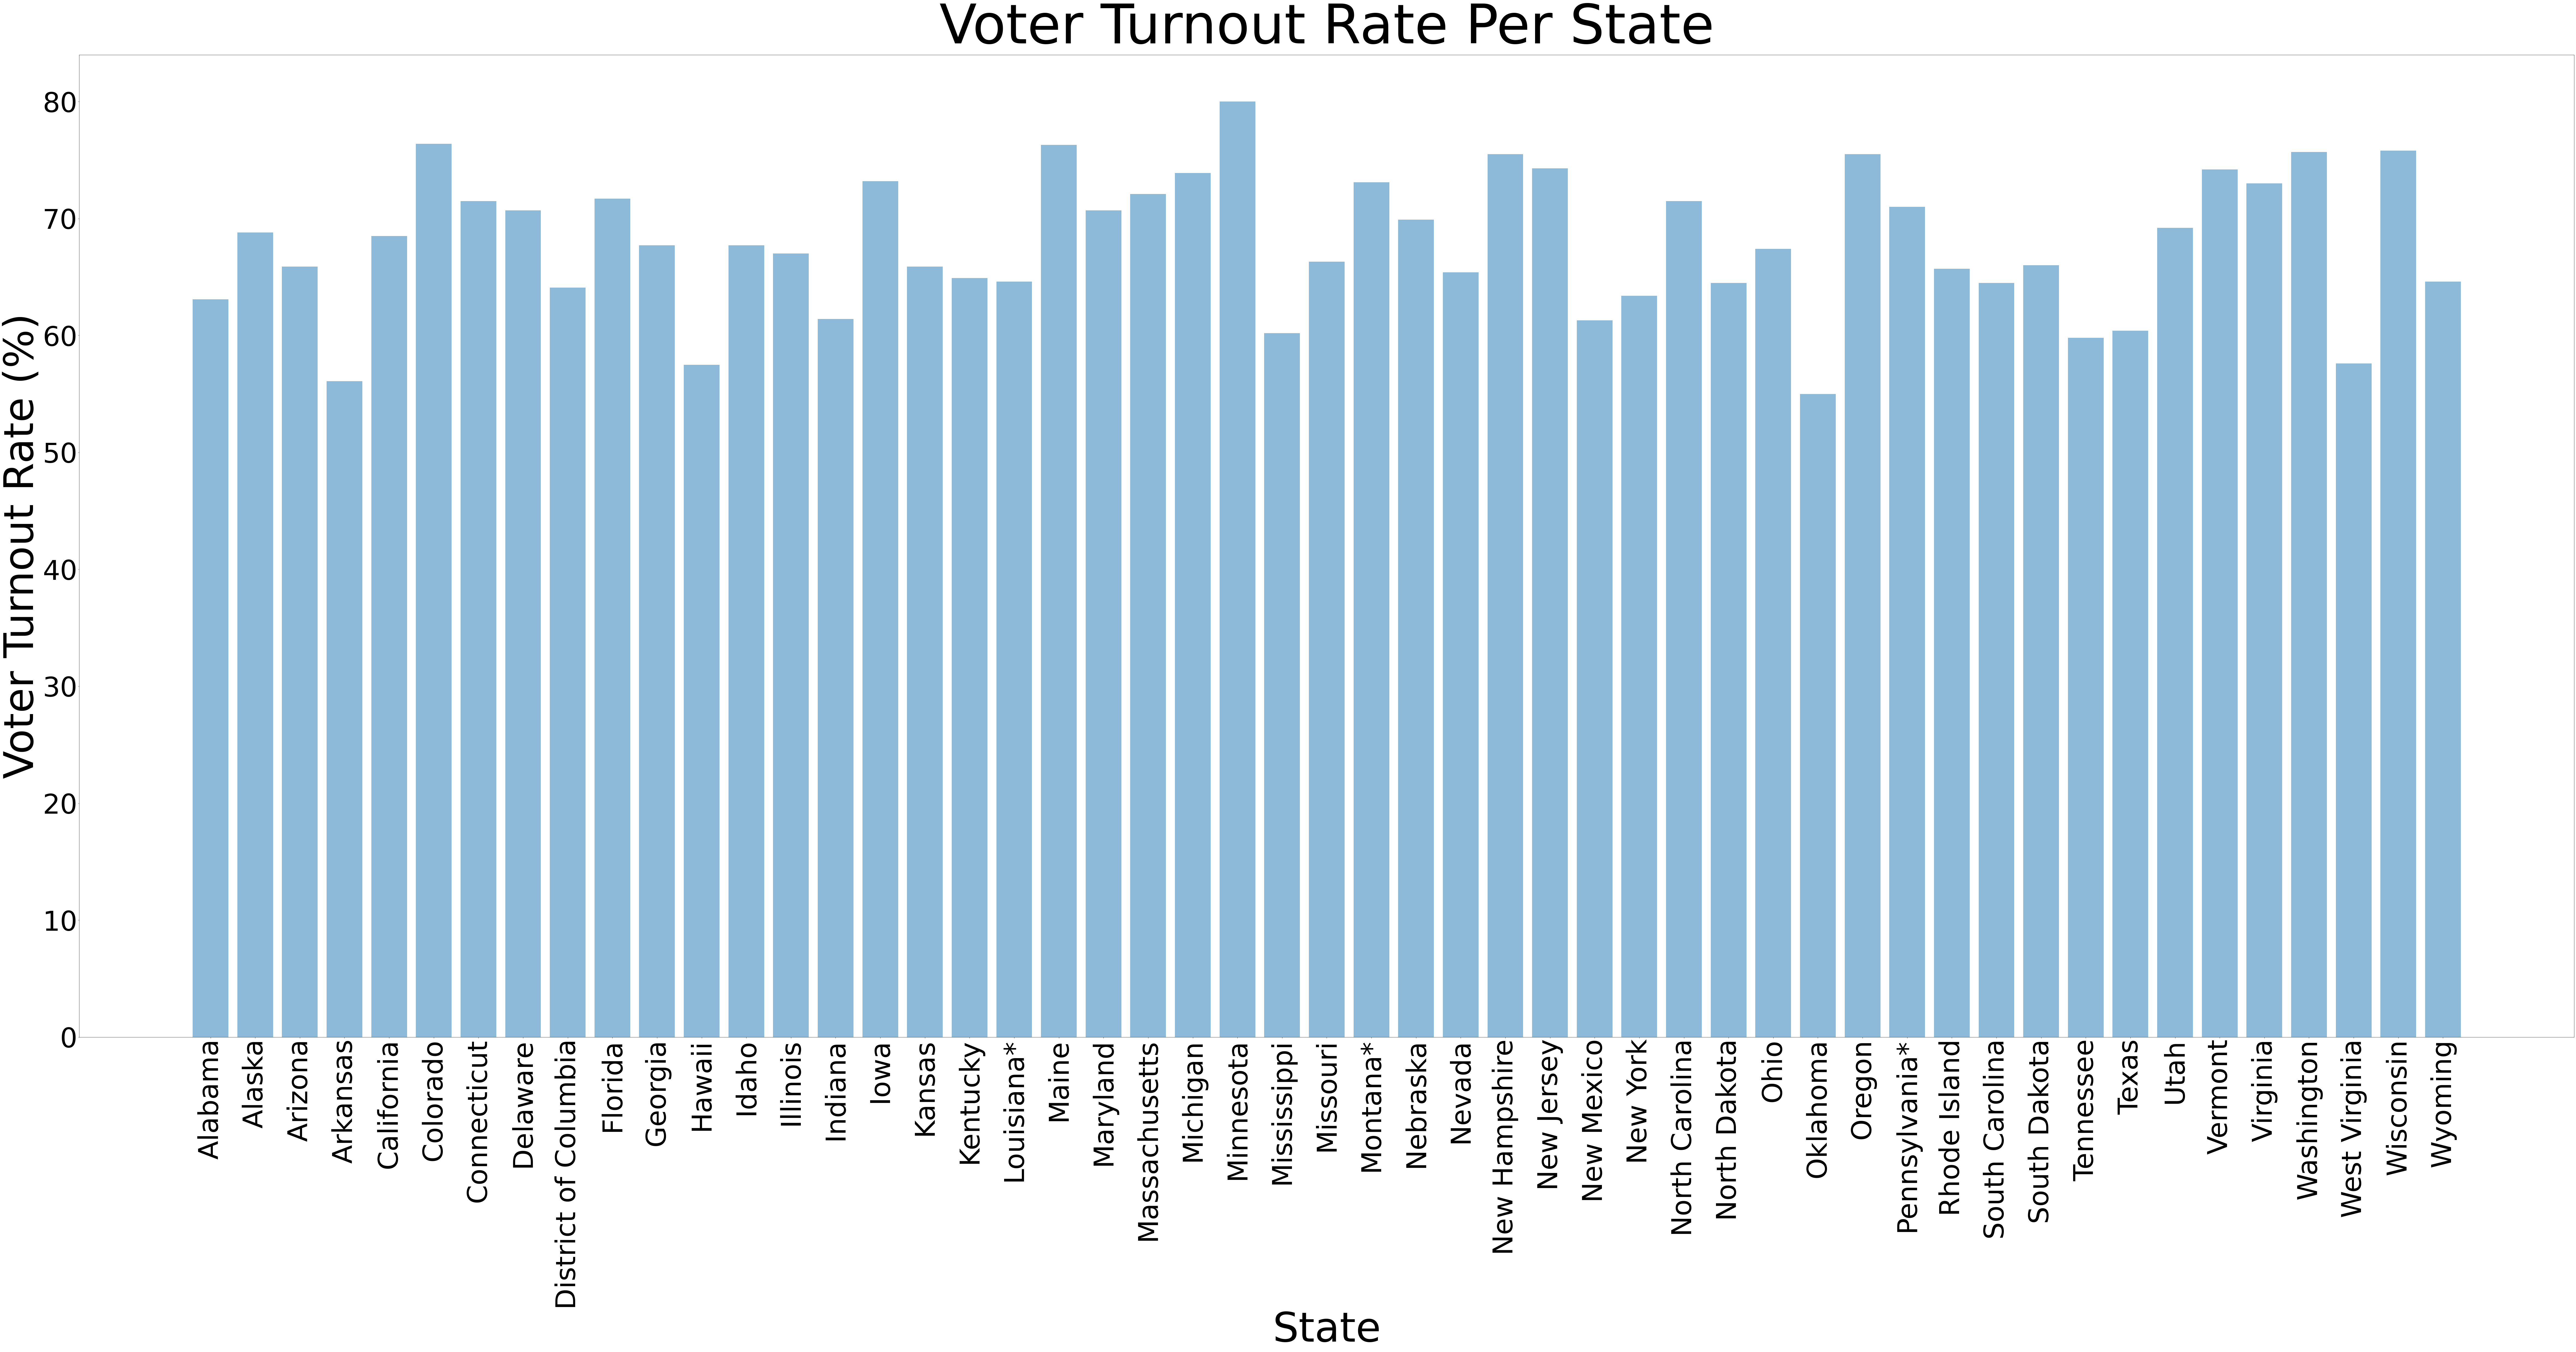

In [416]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(127,50))
plt.ylim([0, 100])
plt.rcParams.update({'font.size': 22})
ax = fig.add_axes([0,0,1,1])
states = df['State']
turnout = df['VEP Turnout Rate (Total Ballots Counted)']
matplotlib.rc('ytick', labelsize=100) 
plt.setp(ax.get_xticklabels(), fontsize=100, rotation='vertical')
plt.bar(states, turnout, align='center', alpha=0.5)
plt.title("Voter Turnout Rate Per State", fontsize = 200)
plt.xlabel("State", fontsize = 150)
plt.ylabel("Voter Turnout Rate (%)", fontsize = 150)
plt.show()

Based on the graph, Minnesota seems to have the highest voter turnout percentage and Oklahoma has the lowest. Minnesota has a long history of being known to have clean elections that make it easy for people to vote. They are one of few states to allow same-day voter registration and can submit absentee ballots starting 40 days before the election. (https://www.minnpost.com/politics-policy/2016/09/five-reasons-why-voter-turnout-minnesota-so-high/) Oklahoma’s low turnout rate also makes sense as its felon population is quite high and Oklahoma’s state law is that felons are not eligible to vote. (https://tulsaworld.com/news/local/govt-and-politics/the-recipe-for-oklahomas-low-voter-turnout-rate/collection_c40200d0-d6ca-11e8-8027-cf0e5c78159d.html#6)

Now let’s find out what states have the highest ballot count. We will make a bar chart for the total ballots counted in every state.

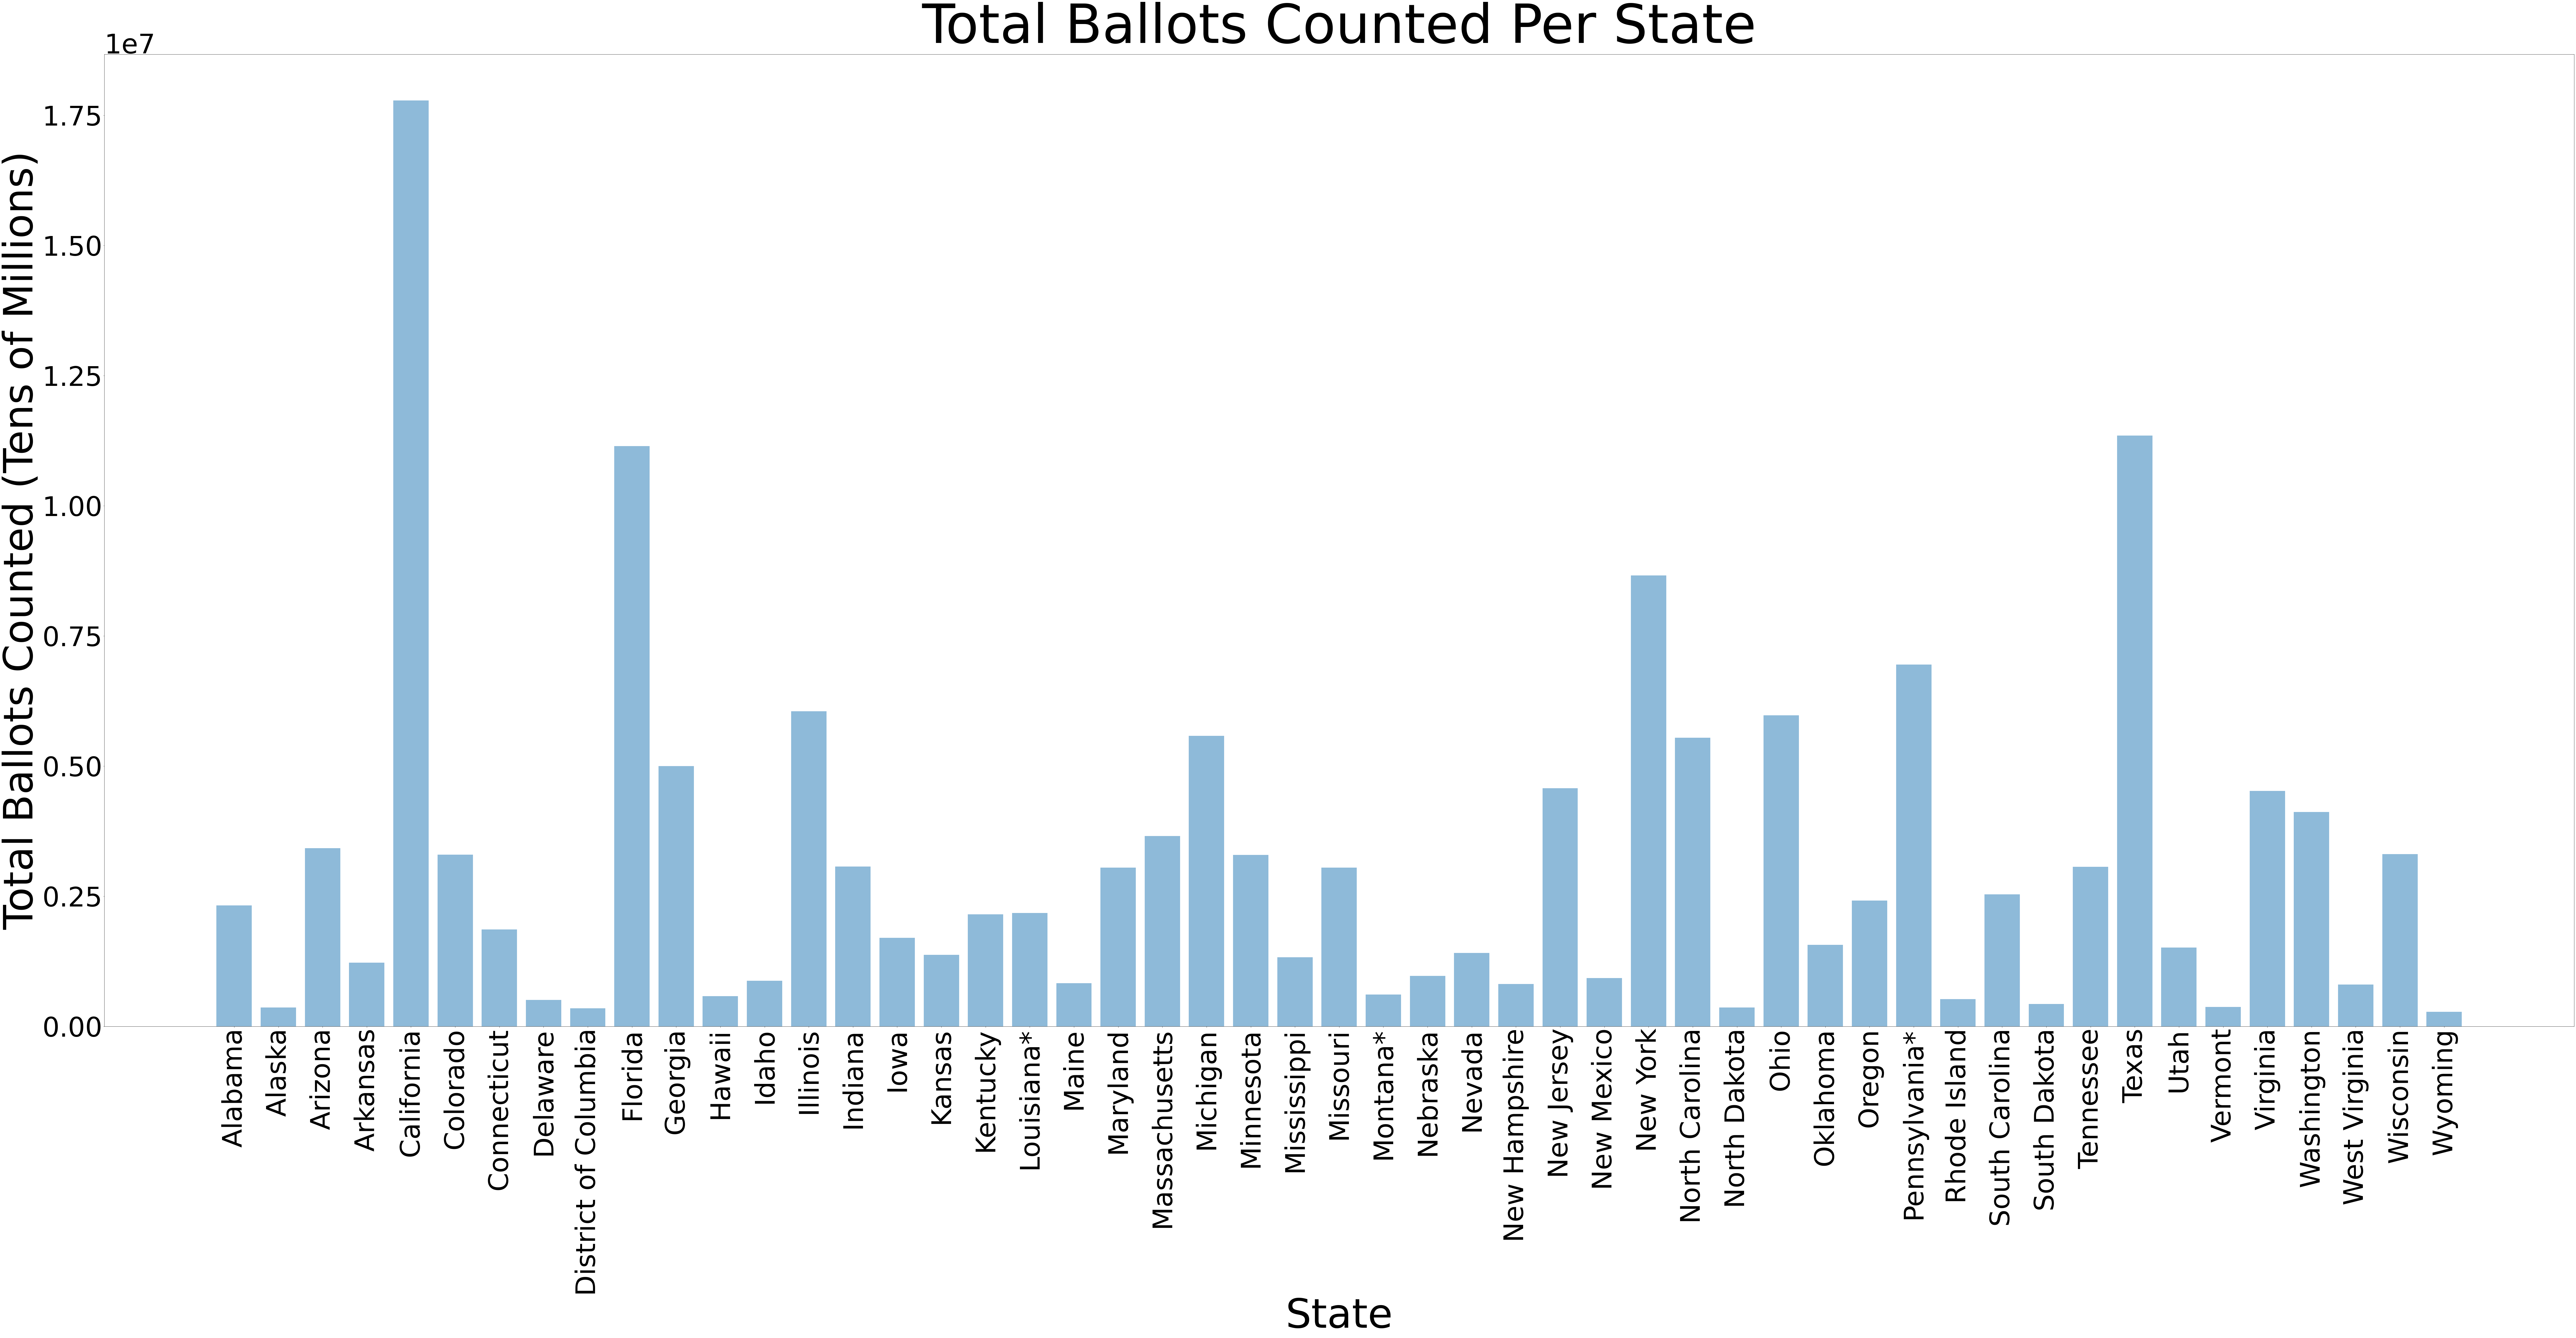

In [425]:
fig= plt.figure(figsize=(127,50))
plt.rcParams.update({'font.size': 22})
ax = fig.add_axes([0,0,1,1])
states = df['State']
turnout = df['Total Ballots Counted (Estimate)']
matplotlib.rc('ytick', labelsize=100) 
plt.bar(states, turnout, align='center', alpha=0.5)
plt.setp(ax.get_xticklabels(), fontsize=100, rotation='vertical')
plt.title("Total Ballots Counted Per State", fontsize = 200)
plt.xlabel("State", fontsize = 150)
plt.ylabel("Total Ballots Counted (Tens of Millions)", fontsize = 150)
plt.show()

The graph shows us that California is the state with the highest ballot count, and Wyoming is the state with the lowest ballot count. This makes sense as California has the largest population, and Wyoming has the lowest population in the United States.

Next, we will graph the voter turnout rates over all Biden-winning states (blue states) vs. Trump-winning states (red states). First we will calculate the total number of ballots cast in red states and the total number of ballots cast in blue states. Then we will add up the total number of eligible voters in red states and the total number of eligible voters in blue states, and divide the number of ballots in red states by the number of eligible voters in red states and the same for blue states. This gives us the voter turnout in red states vs. blue states.

In [431]:
trump_ballots = 0;
red_eligible_voters = 0;
biden_ballots = 0;
blue_eligible_voters = 0;
for i, row in df.iterrows():
    if row['Winner of State'] == 'Trump':
        trump_ballots += row['Total Ballots Counted (Estimate)'];
        red_eligible_voters += row['Voting-Eligible Population (VEP)'];
    else:
        biden_ballots = row['Total Ballots Counted (Estimate)'];
        blue_eligible_voters = row['Voting-Eligible Population (VEP)'];
        
red_voter_turnout = trump_ballots/red_eligible_voters;
blue_voter_turnout = biden_ballots/blue_eligible_voters;
print("Trump-Winning States Voter Turnout: ")
print(red_voter_turnout)
print("Biden-Winning States Voter Turnout: ")
print(blue_voter_turnout)

Trump-Winning States Voter Turnout: 
0.6520268571138683
Biden-Winning States Voter Turnout: 
0.7576919467189192


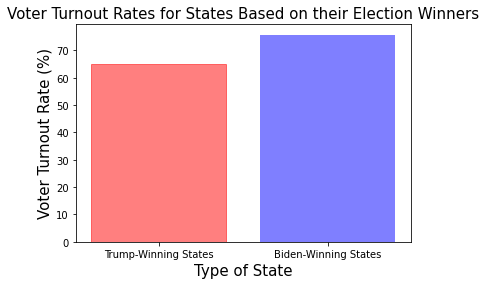

In [451]:
candidates = ['Trump-Winning States', 'Biden-Winning States']
turnout = [red_voter_turnout*100, blue_voter_turnout*100]
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
barlist = plt.bar(candidates, turnout, align='center', alpha=0.5, color = 'blue') 
plt.title("Voter Turnout Rates for States Based on their Election Winners", fontsize = 15)
plt.xlabel("Type of State", fontsize = 15)
plt.ylabel("Voter Turnout Rate (%)", fontsize = 15)
barlist[0].set_color('r')
plt.show()

Next let's create a boxplot showing the overall distribution of voter turnout among Trump winning and Biden winning states. We will create this boxplot using seaborn, a Python data visualization library (more info at https://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Text(0, 0.5, 'Voter Turnout Rate (%)')

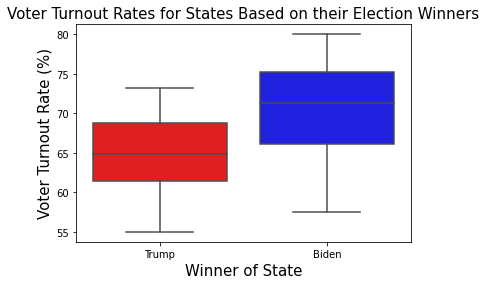

In [466]:
import seaborn as sns
matplotlib.rc('xtick', labelsize=10) 
colors = ['red', 'blue']
ax = sns.boxplot(x=df['Winner of State'], y=df['VEP Turnout Rate (Total Ballots Counted)'], data=df, palette = colors)
plt.title("Voter Turnout Rates for States Based on their Election Winners", fontsize = 15)
plt.xlabel("Winner of State", fontsize = 15)
plt.ylabel("Voter Turnout Rate (%)", fontsize = 15)

The bar graph shows as that there is approximately a 65% voter turnout rate in states that Trump won, and approximately a 75% voter turnout rate in states that Biden won. The box plot shows us that in Trump winning states, the voter turnout rate is concentrated between 62 and 68%, whereas in Biden winning states, the voter turnout is concentrated between 66 and 75%. This corroborates with the result of the election with Biden winning — more people voted in blue states. Additionally, more mail-in voting increases the voter turnout. Biden supporters were more likely to vote by mail than Trump supporters, and universal mail-in voting has a positive increase on turnout. Additionally, many blue states offer easier ways of voting, for example Colorado, Oregon, Washington, and New Jersey all send registered voters their ballots more than two weeks in advance. Most red states do not have these options. It was easier for people in blue states to vote since there were more options offered of how to vote, and more Biden voters were likely to send in mail-in ballots or absentee ballots, increasing the voter turnout in these states (more info at https://www.capradio.org/articles/2020/05/18/does-voting-by-mail-lead-to-higher-turnout-in-red-blue-and-purple-states-its-not-that-simple/).

# Hypothesis Testing and Machine Learning
To perform hypothesis testing, let’s use the statsmodels package, which contains functions for statistical analysis including t-testing, linear regression, ANOVA, and much more. (more info at https://www.statsmodels.org/stable/index.html)

Let's test the hypothesis that a higher percent of non-citizens in a state results in a higher voter turnout rate for that state. We think that there might be a correlation between the two since states with higher amounts of immigrants are more diverse and typically more diverse areas vote for Democrats. Also, based on prior analysis, it seems to be that states with higher voter turnout vote for Democrats so there is a possibility that the two are correlated.

To perform this test, we can set our null and alternative hypotheses. The null hypothesis will be that the coefficient of the linear model is not different from zero.
H0:β1=0 Ha:β1≠0


In [433]:
import statsmodels.api as sm
X = df[['VEP Turnout Rate (Total Ballots Counted)']].values
X = sm.add_constant(X)
y = df['% Non-citizen)'].values

In [434]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.06580
Date:                Sat, 19 Dec 2020   Prob (F-statistic):              0.799
Time:                        21:25:01   Log-Likelihood:                -131.93
No. Observations:                  51   AIC:                             267.9
Df Residuals:                      49   BIC:                             271.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0748      5.354      0.761      0.450      -6.685      14.834
x1             0.0202      0.079      0.257      0.799      -0.138       0.178
==============================================================================
Omnibus:                        7.528   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.105
Skew:                           0.908   Prob(JB):                       0.0287
Kurtosis:                       3.209   Cond. No.                         794.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value is < 0.05 , we reject our null hypothesis that percent of non-citizens in a state has a relationship with voter turnout rate for that state. There is not enough evidence to prove there is a linear relationship between the two.

Now let's test whether a lower amount of total ineligible felons in a state results in a higher voter turnout rate for that state. We think that there might be a negative correlation between the two as fewer eligible citizens would be able to vote.
To perform this test, we again can set our null and alternative hypotheses. The null hypothesis will be that the coefficient of the linear model is not different from zero. H0:β1=0 Ha:β1≠0

In [467]:
import statsmodels.api as sm
X = df[['Total Ineligible Felon']].values
X = sm.add_constant(X)
y = df['VEP Turnout Rate (Total Ballots Counted)'].values

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8560
Date:                Sat, 19 Dec 2020   Prob (F-statistic):              0.359
Time:                        23:25:00   Log-Likelihood:                -161.94
No. Observations:                  51   AIC:                             327.9
Df Residuals:                      49   BIC:                             331.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.3625      0.994     68.778      0.000      66.365      70.360
x1         -8.885e-06    9.6e-06     -0.925      0.359   -2.82e-05    1.04e-05
==============================================================================
Omnibus:                        1.150   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.120
Skew:                          -0.224   Prob(JB):                        0.571
Kurtosis:                       2.429   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This one also has a p-value < 0.05 and therefore, we reject our null hypothesis that the number of ineligible felons in a state has a relationship with voter turnout rate for that state. There is not enough evidence to prove there is a linear relationship between the two.


Now let’s try performing regression using multiple features with a random forest regressor.


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


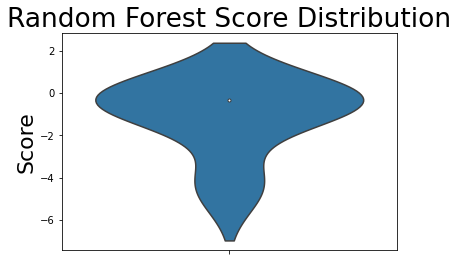

In [468]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import seaborn as sns
X = df[['VEP Turnout Rate (Total Ballots Counted)']].values
y = df['Voting-Eligible Population (VEP)'].values

kf = KFold(n_splits=5, random_state=0)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))

scores

_ = sns.violinplot(scores, orient="v")
_ = plt.title("Random Forest Score Distribution")
_ = plt.ylabel("Score")

In this case, the random forest was not able to accurately predict voter turnout rate based on voting-eligible population from the features we provided. In the future, we could perform parameter tuning or try a different classifier to see if these scores may improve.